<a href="https://colab.research.google.com/github/yashpickles/Stock_Price_Predictor/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Predictor**

### **-Yash Acharya**

## **Installing the yfinance API**

In [36]:
pip install yfinance

## **Importing the Libraires**

In [37]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np
import pandas_datareader as web

## **Scraping the API**

In [38]:
company = 'TSLA'


In [39]:
start = dt.datetime(2020,1,1)

In [40]:
end = dt.datetime(2021,1,1)

In [41]:
dataset = web.DataReader(company, 'yahoo', start, end)

## **Visualization of the Dataset**

In [42]:
dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [43]:
dataset.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,666.090027,641.000000,642.98999,661.770020,22865600.0,661.770020
2020-12-28,681.400024,660.799988,674.51001,663.690002,32278600.0,663.690002
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990
2020-12-30,696.599976,668.359985,672.00000,694.780029,42846000.0,694.780029
2020-12-31,718.719971,691.119995,699.98999,705.669983,49570900.0,705.669983


In [44]:
dataset.shape

(253, 6)

In [45]:
dataset.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,297.288411,280.697937,289.108428,289.997067,7.532903e+07,289.997067
std,171.702889,163.350196,167.665389,168.995613,4.015651e+07,168.995613
min,80.972000,70.101997,74.940002,72.244003,1.735770e+07,72.244003
25%,154.990005,143.222000,148.367996,149.792007,4.713450e+07,149.792007
50%,245.600006,237.119995,244.296005,241.731995,7.025550e+07,241.731995
75%,430.500000,410.579987,421.390015,421.200012,9.454550e+07,421.200012
max,718.719971,691.119995,699.989990,705.669983,3.046940e+08,705.669983


## **Cleaning Data**

In [46]:
dataset.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

## **Creating Histogram for Stock Price**

In [47]:
dataset2 = dataset

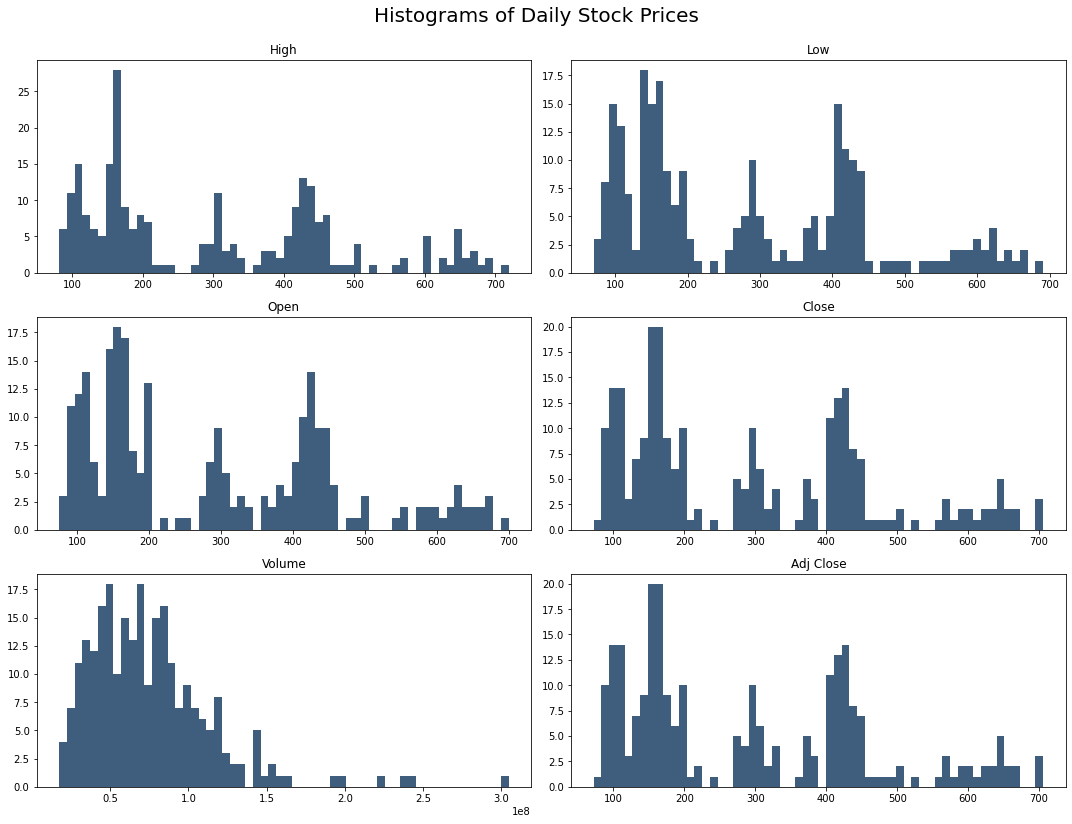

In [48]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Daily Stock Prices', fontsize=20)
for i in range (dataset2.shape[1]):
  plt.subplot(3, 2, i+1)
  f = plt.gca()
  f.set_title(dataset2.columns.values[i])
  vals = np.size(dataset2.iloc[:, i])
  if vals >= 58:
    vals = 58
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## **Bar Plot for the Variables**

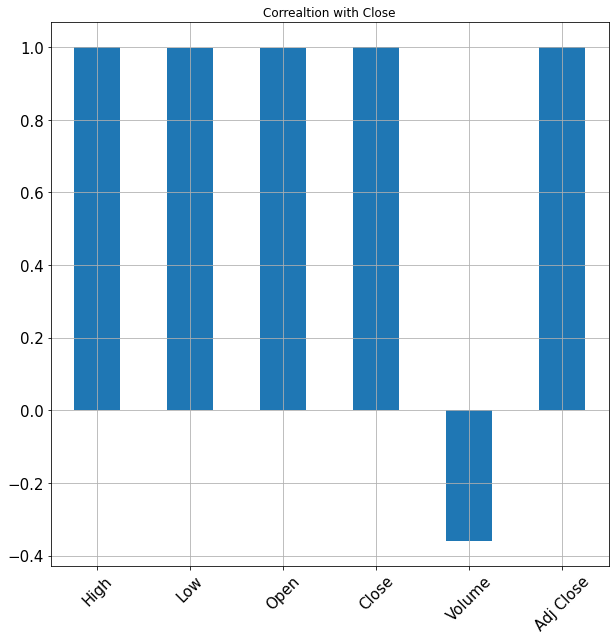

In [49]:
dataset2.corrwith(dataset.Close).plot.bar(figsize=(10, 10), title = 'Correaltion with Close', fontsize=15, rot=45, grid=True )

## **Feature Scalling**

In [50]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range = (0, 1))
Scaled_data = Scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

In [51]:
prediction_days = 60

In [52]:
X_train = []
y_train = []

In [53]:
for x in range(prediction_days, len(Scaled_data)):
  X_train.append(Scaled_data[x-prediction_days:x, 0])
  y_train.append(Scaled_data[x, 0])

In [54]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

## **Building the LSTM Model**

## **a) Initializing the Model**

In [55]:
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
lstm = tf.keras.models.Sequential()

##**b) LSTM**

In [56]:
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50, return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units =50))
lstm.add(Dropout(0.2))

## **c) Output Layer**

In [57]:
lstm.add(Dense(units=1))

## **d) Training the LSTM**

In [58]:
lstm.compile(optimizer='adam', loss='mean_squared_error')

## **e) Training the LSTM on the Training set**

In [59]:
lstm.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
7/7 [==============================] - 5s 91ms/step - loss: 0.1596
Epoch 2/50
7/7 [==============================] - 1s 117ms/step - loss: 0.0484
Epoch 3/50
7/7 [==============================] - 1s 88ms/step - loss: 0.0273
Epoch 4/50
7/7 [==============================] - 1s 89ms/step - loss: 0.0138
Epoch 5/50
7/7 [==============================] - 1s 88ms/step - loss: 0.0136
Epoch 6/50
7/7 [==============================] - 1s 89ms/step - loss: 0.0118
Epoch 7/50
7/7 [==============================] - 1s 89ms/step - loss: 0.0075
Epoch 8/50
7/7 [==============================] - 1s 92ms/step - loss: 0.0084
Epoch 9/50
7/7 [==============================] - 1s 88ms/step - loss: 0.0082
Epoch 10/50
7/7 [==============================] - 1s 94ms/step - loss: 0.0072
Epoch 11/50
7/7 [==============================] - 1s 92ms/step - loss: 0.0113
Epoch 12/50
7/7 [==============================] - 1s 88ms/step - loss: 0.0081
Epoch 13/50
7/7 [==============================] - 1s 88ms/s

## **Loading the Test Data**

In [60]:
test_start = dt.datetime(2020,11,30)
test_end = dt.datetime.now()

In [61]:
test_dataset = web.DataReader(company, 'yahoo', test_start, test_end )
actual_prices = test_dataset['Close'].values
total_dataset = pd.concat((dataset['Close'], test_dataset['Close']), axis=0)
model_input = total_dataset[len(total_dataset) - len(test_dataset) - prediction_days:].values

In [62]:
model_input = model_input.reshape(-1, 1)
model_input = Scaler.transform(model_input) 

## **Predicitng the Test Set**

In [63]:
X_test = []
for x in range(prediction_days, len(model_input)):
  X_test.append(model_input[x-prediction_days:x, 0])

In [64]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [65]:
predicted_prices = lstm.predict(X_test)
predicted_prices = Scaler.inverse_transform(predicted_prices)

## **Plotting the Test Prediction**

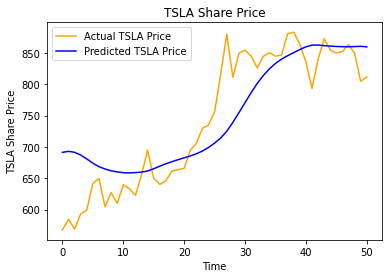

In [66]:
plt.plot(actual_prices, color='orange', label = f"Actual {company} Price")
plt.plot(predicted_prices, color='blue', label = f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

## **Predict the Next Day**

In [67]:
real_data = [model_input[len(model_input) + 1 - prediction_days:len(model_input+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
prediction = lstm.predict(real_data)
prediction = Scaler.inverse_transform(prediction)
print(f"prediction: {prediction}")

prediction: [[857.85175]]
